In [22]:
from matplotlib import pyplot as plt
from collections import Counter
from numpy import math
import random

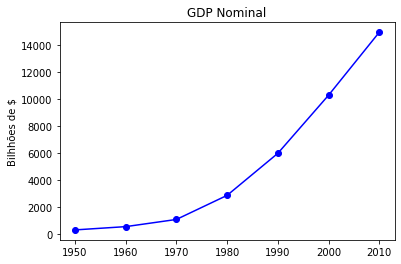

In [4]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.3,1075.9,2862.5,5979.6,10289,14958.3]
plt.plot(years,gdp,color="blue",marker="o",linestyle = "solid")
plt.title("GDP Nominal")
plt.ylabel("Bilhhões de $")
plt.show()


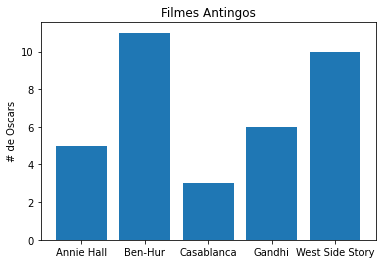

In [8]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5,11,3,6,10]
xs = [i + 0.1 for i, _ in enumerate(movies)]
plt.bar(xs,num_oscars)
plt.ylabel("# de Oscars")
plt.title("Filmes Antingos")
plt.xticks(xs, movies)
plt.show()

Text(0.5, 1.0, 'Notas da prova 1')

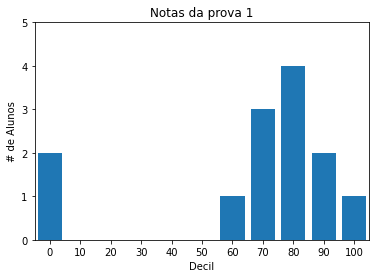

In [19]:
grades = [83,95,91,87,79,0,85,82,100,67,73,77,0]
decile = lambda grade:grade // 10*10
histrogram = Counter(decile(grade) for grade in grades)
plt.bar([x for x in histrogram.keys()], histrogram.values(),8)
plt.axis([-5,105,0,5])
plt.xticks([10*i for i in range(11)])
plt.xlabel("Decil")
plt.ylabel("# de Alunos")
plt.title("Notas da prova 1")

probability density function

In [4]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

cumulative distribution function

In [3]:
def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

Distribuição Normal

In [2]:
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma **2)/(sqrt_two_pi*sigma))

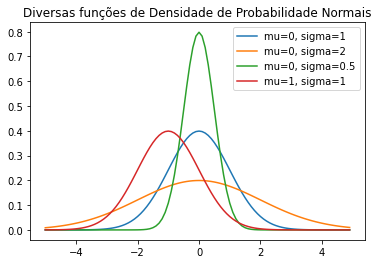

In [5]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs]
         ,'-'
         ,label = 'mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs]
         ,'-'
         ,label = 'mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs]
         ,'-'
         ,label = 'mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs]
         ,'-'
         ,label = 'mu=1, sigma=1')
plt.legend()
plt.title("Diversas funções de Densidade de Probabilidade Normais")
plt.show()
 

Distribuição Normal (CDF)

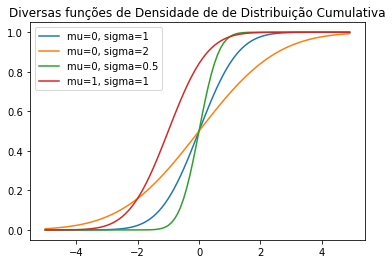

In [6]:
def normal_cdf(x,mu=0,sigma=1):
    return(1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs]
         ,'-'
         ,label = 'mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs]
         ,'-'
         ,label = 'mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs]
         ,'-'
         ,label = 'mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs]
         ,'-'
         ,label = 'mu=1, sigma=1')
plt.legend()
plt.title("Diversas funções de Densidade de de Distribuição Cumulativa")
plt.show()


In [7]:
def inverte_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
    if mu!= 0 or sigma != 1:
        return mu + sigma * inverte_normal_cdf(p,tolerance=tolerance)
    low_z, low_p = -10.0,0
    hi_z,hi_p = 10.0,1
    while hi_z - low_z > tolerance:
        mid_z = (low_z+hi_z)/2
        mid_p = normal_cdf(mid_z)
        if mid_p <p:
            low_z, low_p = mid_z,mid_p
        elif mid_p>p:
            hi_z,hi_p = mid_z,mid_p
        else:
            break
    return mid_z

Teorema do limite central

In [29]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

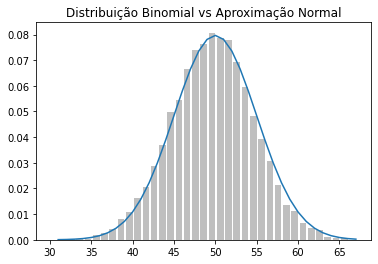

In [60]:
def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]

    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()]
        ,[v/num_points for v in histogram.values()]
        ,0.8
        ,color = '0.75')

    mu = p*n
    sigma = math.sqrt(n*p*(1-p))

    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i + 0.5, mu, sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Distribuição Binomial vs Aproximação Normal")
    plt.show()

make_hist(0.5,100,10000)

Teste de Hipoteses


In [70]:
def normal_approximation_to_binomial(n,p):
    mu  = p*n
    sigma = math.sqrt(p*(1-p)*n)
    return mu,sigma
    

In [63]:
normal_probability_below = normal_cdf
def normal_probability_above (lo,mu=0,sigma=1):
    return 1 - normal_cdf(lo,mu,sigma)
def normal_prbability_between(lo,hi,mu=0,sigma=1):
    return normal_cdf(hi,mu,sigma) - normal_cdf(lo,mu,sigma)
def normal_probability_outside(lo,hi,mu=0,sigma=1):
    return 1 - normal_prbability_between(lo,hi,mu,sigma)
def normal_upper_bound(probability,mu=0,sigma=1):
    return inverte_normal_cdf(probability,mu,sigma)
def normal_lower_bound(probability,mu,sigma):
    return inverte_normal_cdf(1-probability,mu,sigma)
def normal_two_sided_bouds(probability,mu=0,sigma=1):
    tail_probability = (1-probability)/2
    upper_bound = normal_lower_bound(tail_probability,mu,sigma)
    lower_bound = normal_upper_bound(tail_probability,mu,sigma)
    return lower_bound,upper_bound

In [71]:
mu_0,sigma_0 = normal_approximation_to_binomial(1000,0.5)
normal_two_sided_bouds(0.95,mu_0,sigma_0)

(469.01026640487555, 530.9897335951244)

Poder de teste

In [73]:
lo, hi = normal_two_sided_bouds(0.95,mu_0,sigma_0)
mu_1,sigma_1 = normal_approximation_to_binomial(1000,0.55)
type_2_probability = normal_prbability_between(lo,hi,mu_1,sigma_1)
power = 1-type_2_probability

0.8865480012953671

In [74]:
hi = normal_upper_bound(0.95,mu_0,sigma_0)
type_2_probability = normal_probability_below(hi,mu_1,sigma_1)
power = 1-type_2_probability
power

0.9363794803307173

P-Values

In [75]:
def two_side_p_values(x,mu = 0,sigma=1):
    if x >= mu:
        return 2* normal_probability_above(x,mu,sigma)
    else:
        return 2 * normal_probability_below(x,mu,sigma)
    
two_side_p_values(529.5,mu_0,sigma_0)

0.06207721579598835

simulação

In [77]:
extreme_value_count = 0
for _ in range(100000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1
print(extreme_value_count/100000)

0.06198


In [79]:
def estimated_parameters(N,n):
    p= n/N
    sigma = math.sqrt(p*(1-p)/N)
    return p,sigma

def a_b_test_statistcs(N_A,n_A,N_B,n_B):
    p_A, sigma_A = estimated_parameters(N_A,n_A)
    p_B, sigma_B = estimated_parameters(N_B,n_B)
    return (p_B - p_A)/math.sqrt(sigma_A**2 + sigma_B**2)

z = a_b_test_statistcs(1000,200,1000,150)
two_side_p_values(z)

0.003189699706216853